In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('../ProjectData/2018_JP_VP_Level4.csv')

In [11]:
df.shape

(221764, 12)

In [12]:
df = df.dropna()
df.shape

(164646, 12)

In [13]:
df.head()

,DateTime,Site_Name,Chla_Water_EXO,SensorDepth_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,Turbidity_Water_EXO,pH_Water_EXO,PC_Water_EXO,fDOM_Water_EXO
674,2018-05-14 16:07:00,VP_AnthonysNose,0.198,0.99,12.53,108.84,138.63,9.12,0.51,7.630000,0.151472,1.030458
675,2018-05-14 16:08:00,VP_AnthonysNose,0.099,1.80,12.53,108.75,138.62,9.12,0.49,7.629989,0.151472,1.066934
676,2018-05-14 16:09:00,VP_AnthonysNose,0.072,3.04,12.54,108.85,138.54,9.12,0.53,7.629978,0.171402,1.021339
677,2018-05-14 16:10:00,VP_AnthonysNose,0.180,3.83,12.54,108.83,138.50,9.11,0.54,7.629967,0.171357,1.057743
679,2018-05-14 16:12:00,VP_AnthonysNose,0.324,4.83,12.55,108.80,138.45,9.07,0.51,7.629945,0.161223,1.020990


In [14]:
df_cols = df.columns

## Let's look into the correlations:

In [15]:
features = ['DateTime', 'Chla_Water_EXO', 'SensorDepth_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'Turbidity_Water_EXO', 'pH_Water_EXO',
       'PC_Water_EXO', 'fDOM_Water_EXO']

df.corr()

/var/folders/gw/lpzg_5qx4xs1zxy36cq8fs0r0000gn/T/ipykernel_3408/1935570831.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Chla_Water_EXO,SensorDepth_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,Turbidity_Water_EXO,pH_Water_EXO,PC_Water_EXO,fDOM_Water_EXO
Chla_Water_EXO,1.000000,-0.217279,0.472472,0.346568,0.482358,-0.176868,0.544613,0.171426,0.278014,0.000048
SensorDepth_Water_EXO,-0.217279,1.000000,-0.009118,-0.585003,-0.483456,-0.756599,0.080498,-0.777386,0.431884,0.622523
DO_Water_EXO,0.472472,-0.009118,1.000000,0.721911,0.159937,-0.384018,0.412185,0.213032,0.069762,-0.089650
DO-Sat_Water_EXO,0.346568,-0.585003,0.721911,1.000000,0.355133,0.356144,0.095888,0.744874,-0.358659,-0.613629
SpCond_Water_EXO,0.482358,-0.483456,0.159937,0.355133,1.000000,0.253773,0.542918,0.249633,-0.258629,-0.395579
Temperature_Water_EXO,-0.176868,-0.756599,-0.384018,0.356144,0.253773,1.000000,-0.453452,0.699138,-0.586620,-0.707674
Turbidity_Water_EXO,0.544613,0.080498,0.412185,0.095888,0.542918,-0.453452,1.000000,-0.264840,0.210644,0.241654
pH_Water_EXO,0.171426,-0.777386,0.213032,0.744874,0.249633,0.699138,-0.264840,1.000000,-0.350307,-0.795513
PC_Water_EXO,0.278014,0.431884,0.069762,-0.358659,-0.258629,-0.586620,0.210644,-0.350307,1.000000,0.503899
fDOM_Water_EXO,0.000048,0.622523,-0.089650,-0.613629,-0.395579,-0.707674,0.241654,-0.795513,0.503899,1.000000


## Turbidity
Turbidity is caused by particles suspended or dissolved in water that scatter light making the water appear cloudy or murky. Particulate matter can include sediment - especially clay and silt, fine organic and inorganic matter, soluble colored organic compounds, algae, and other microscopic organisms.


## Observations:

1. `Temperature_Water_EXO` has high correlations with `Chla_Water_EXO`, `SpCond_Water_EXO`
2. `DO_Water_EXO` has high correlation with `DO-Sat_Water_EXO`
3. `DO-Sat_Water_EXO` has high correlation with `pH_Water_EXO`

In [26]:
import matplotlib.pyplot as plt

In [19]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df['DateTime'].describe

<bound method NDFrame.describe of 674      2018-05-14 16:07:00
675      2018-05-14 16:08:00
676      2018-05-14 16:09:00
677      2018-05-14 16:10:00
679      2018-05-14 16:12:00
                 ...        
220811   2018-11-22 04:29:00
220812   2018-11-22 04:30:00
220813   2018-11-22 04:31:00
220815   2018-11-22 04:33:00
220816   2018-11-22 04:34:00
Name: DateTime, Length: 164646, dtype: datetime64[ns]>

<Axes: xlabel='DateTime'>

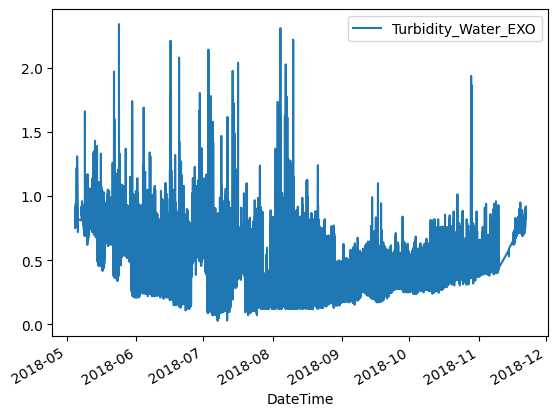

In [27]:
df.plot(x='DateTime', y='Turbidity_Water_EXO', ax=plt.gca())

<Axes: xlabel='DateTime'>

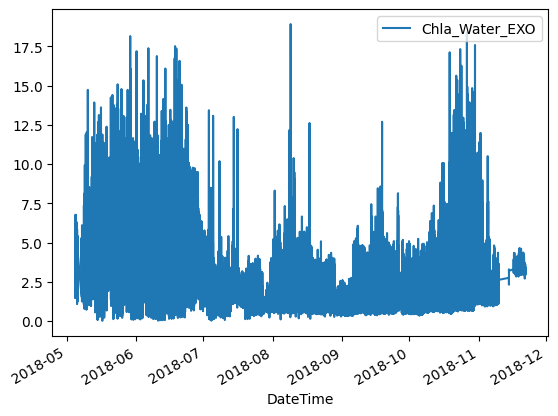

In [30]:
df.plot(x='DateTime', y='Chla_Water_EXO', ax=plt.gca())

### Observation:

As `Chla_Water_EXO` increases, `Turbidity_Water_EXO` also increases